# Machine learning Project of Regression

# Part 1:

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

# Loading and splitting Dataset 

In [399]:
# Loading Dataset
url = "Part1_data12.csv"
dataset = pd.read_csv(url)

In [400]:
#Shape : Dimensions of the dataset
print("Dimension = {0:d}*{1:d}".format(dataset.shape[0],dataset.shape[1]))

Dimension = 220*2


# Randomly mix the dataset by the function simple

In [401]:
dataframe = pd.DataFrame(dataset)
dataframe_mixed = dataframe.sample(frac=1)
# dataframe_mixed

# We take 70% as a training data and 30% as a testing data

In [402]:
training_dataset_df = dataframe_mixed[:int(len(dataframe)*0.7)]
# training_dataset

testing_dataset_df  = dataframe_mixed[int(len(dataframe)*0.7):len(dataframe)]
# testing_dataset

In [403]:
# Saving training and testing dataset to a cqsv files
training_dataset_df.to_csv(r'training_dataset.csv', index=False, header=True)
testing_dataset_df.to_csv(r'testing_dataset.csv'  , index=False, header=True)

# Question 1 Read and visualize the given data.

In [404]:
training_dataset_url = "training_dataset.csv"
testing_dataset_url  = "testing_dataset.csv"

training_dataset = pd.read_csv(training_dataset_url)
testing_dataset  = pd.read_csv(testing_dataset_url)

# Give the mean/median/min/max for each feature.

In [9]:
# Calculation of the mean of x
print("mean(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).mean())))

# Calculation of the median of x
print("median(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).median())))

# Calculation of the max of x
print("max(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).max())))

# Calculation of the min of x
print("min(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).min())))

mean(x) = 12.95
median(x) = 12.95
max(x) = 23.90
min(x) = 2.00


# Question2: Use scatter plot to represent your training dataset.

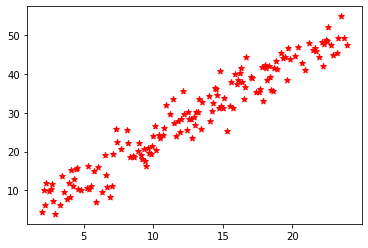

In [10]:
# Plotting the training dataset
plt.scatter(training_dataset['x'], training_dataset['y'], c = 'red', marker = '*')

In [406]:
# Plotting the training dataset with hypotesis function
def plot_h(w,df):
    plt.scatter(df['x'], df['y'], c = 'red', marker = '*')
    plt.plot([df['x'].min(),df['x'].max()],[h(df['x'].min(),w),h(df['x'].max(),w)], linewidth=4)

# Question5:

# The hypothesis function. 

In [394]:
# The hypothesis function. 
def h(x,w):
    return w[1]*x + w[0]

# The empirical error

# Mean Squared Error(MSE)

In [387]:
# The empirical error MSE
def MSE(w,d_set):
    MSE = 0
    for i in range(len(d_set)):
        MSE = MSE + pow((d_set['y'][i] - h(d_set['x'][i],w)),2)
    return MSE/len(d_set)

# Root-Mean-Squared-Error(RMSE).

In [388]:
# The empirical error RMSE
def RMSE(w,d_set):
    return np.sqrt(MSE(w,d_set))

# Mean-Absolute-Error(MAE).

In [389]:
# The empirical error MAE
def MAE(w,d_set):
    MAE = float(0)
    for i in range(len(d_set)):
        MAE = MAE + np.abs((d_set['y'][i] - h(d_set['x'][i],w)))
    return MAE/len(d_set)

# Gradient

In [390]:
# Calculation of the gradient
def gradient(w, d_set, empiricalError = MSE):
    grad = []
    wi = [float(0) for i in range(len(w))]
    for i in range(len(w)):
        for k in range(len(w)):
            wi[k] = w[k]
        wi[i] = wi[i] + 1e-10
        grad.append((empiricalError(wi,d_set) - empiricalError(w,d_set))/1e-10)
    return grad

# Armijo's learning rate

In [391]:
# Calculation of the step Armijo
def armijo(wk, dk, d_set, empiricalError = MSE):
    alpha = 1
    X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    while empiricalError(np.add(wk, np.multiply(alpha,dk)), d_set) - empiricalError(wk, d_set) > X:
        alpha = alpha/2
        X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    return alpha

# Gradient Descent Method

In [392]:
# Gradient descent method
def gradientDescent(delta, wk, d_set, armij = False, alpha = 0, empiricalError = MSE):
    gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
    k = 0
    while np.linalg.norm(gk)>delta:
        if k<500:
            break
        if armij == True:
            alpha = armijo(wk,gk, d_set)
        wk = np.add(wk, np.multiply(alpha,gk))
        gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
        k = k+1
    return wk
# print("{0:d}- Ls = {1:.2f}".format(int(k),float(empiricalError(wk))))

In [408]:
# Calculation of the regression model for our four model

w_optim_001 = gradientDescent(0.1, [1,1], training_dataset, alpha  = 0.01) # MSE
print("alpha=0.01: w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_001[0],w_optim_001[1],MSE(w_optim_001,training_dataset)))

w_optim_002 = gradientDescent(0.1, [1,1], training_dataset, alpha  = 0.02) # RMSE
print("alpha=0.02: w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_002[0],w_optim_002[1],MSE(w_optim_002,training_dataset)))

w_optim_003 = gradientDescent(0.1, [1,1], training_dataset, alpha  = 0.03) # RMSE
print("alpha=0.03: w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_003[0],w_optim_003[1],MSE(w_optim_003,training_dataset)))

w_optim_armijo  = gradientDescent(0.1, [1,1], training_dataset, armij = True) # MAE
print("Armijo    : w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_armijo[0],w_optim_armijo[1],MSE(w_optim_armijo,training_dataset)))


Armijo    : w* = [1.25, 2.13], Emp_Error = 12.16 


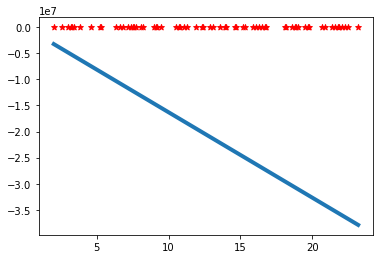

In [201]:
# alpha  = 0.01
plot_h(w_optim_001,training_dataset)

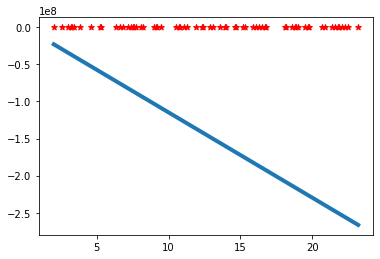

In [202]:
# alpha  = 0.02
plot_h(w_optim_002,training_dataset)

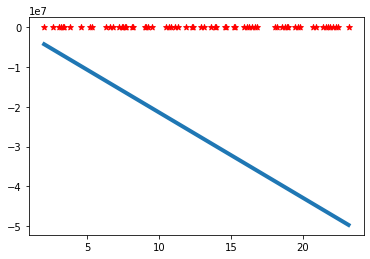

In [203]:
# alpha  = 0.03
plot_h(w_optim_003,training_dataset)

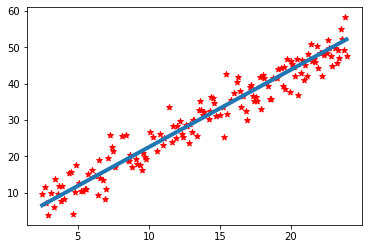

In [409]:
# Armijo step
plot_h(w_optim_armijo,training_dataset)

# Question7: Evaluation of our 4 models with the testing dataset and return the generalization error.

In [226]:
# Calculation of the general error for our 4 models
# the model with alpha = 0.01
MSE_alpha001 = MSE(w_optim_001   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha001))
# the model with alpha = 0.02
MSE_alpha002 = MSE(w_optim_002   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha002))
# the model with alpha = 0.03
MSE_alpha003 = MSE(w_optim_003   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha003))
# the model with armijo learning rate
MSE_armijo   = MSE(w_optim_armijo, testing_dataset)
print("MSE = {0:.2f}".format(MSE_armijo))

MSE = 517459236468830.81
MSE = 25606662554446804.00
MSE = 890872929386979.88
MSE = 10.23


# Question8: Estimate generalization error (bias-variance) and interpret results

Biais

In [250]:
def bias(w,d_set):
    Bias = 0
    for i in range(len(d_set)):
        Bias = Bias + pow(h(d_set['x'][i],w) - d_set['y'][i],2)
    return np.sqrt(Bias)

In [252]:
print("model 1 Bias = {0:.2f}".format(bias(w_optim_001,dataframe)))
print("model 2 Bias = {0:.2f}".format(bias(w_optim_002,dataframe)))
print("model 3 Bias = {0:.2f}".format(bias(w_optim_003,dataframe)))
print("model 4 Bias = {0:.2f}".format(bias(w_optim_armijo,dataframe)))

model 1 Bias = 349260805.45
model 2 Bias = 2456744913.65
model 3 Bias = 458245687.92
model 4 Bias = 52.40


Variance

In [253]:
def variance(w,d_set):
    mean_Ypred = 0
    for i in range(len(d_set)):
        mean_Ypred = mean_Ypred + h(d_set['x'][i],w)
    mean_Ypred = mean_Ypred/len(d_set)
    
    Var = 0
    for i in range(len(d_set)):
        Var = Var + pow(h(d_set['x'][i],w) - mean_Ypred,2)
    return Var/len(d_set)

In [254]:
print("model 1 Variance = {0:.2f}".format(variance(w_optim_001,dataframe)))
print("model 2 Variance = {0:.2f}".format(variance(w_optim_002,dataframe)))
print("model 3 Variance = {0:.2f}".format(variance(w_optim_003,dataframe)))
print("model 4 Variance = {0:.2f}".format(variance(w_optim_armijo,dataframe)))

model 1 Variance = 107867028291376.53
model 2 Variance = 5318034188001387.00
model 3 Variance = 185187000385875.69
model 4 Variance = 183.81


In [65]:
dataframe = dataframe.drop(6, axis = 0)

In [70]:
dataframe.index[0]

2

In [ ]:
# Euclidient distance
def d2(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [329]:
# Covering Number
def coveringNumber(df, eps):
    new_df = []
    while len(df.index)>0:
        cur = random.randint(0, len(df.index)-1)
        lst_index = []
        for i in range(len(df.index)):
            p1 = [ df['x'][df.index[cur]], df['y'][df.index[cur]] ]
            p2 = [ df['x'][df.index[i  ]], df['y'][df.index[i  ]] ]
            if d2(p1, p2)<eps:
                lst_index.append(df.index[i])
        new_df.append([ df['x'][df.index[cur]], df['y'][df.index[cur]]])
        for i in range(len(lst_index)):
            df = df.drop(lst_index[i], axis=0)
    return new_df

In [349]:
epsilon = 3
new_dataframe = coveringNumber(dataframe, epsilon)

In [350]:
pd.DataFrame(new_dataframe)

,0,1
0,20.4,46.875766
1,3.8,7.862090
2,7.8,8.752661
3,5.0,14.610704
4,18.2,38.475830
5,18.3,42.095983
6,22.2,42.188781
7,8.5,18.928064
8,2.7,11.635610
9,23.3,49.291005


In [354]:
# Covering Number
def coveringNumber(df, eps):
    new_df = []
    while len(df.index)>0:
        cur = random.randint(0, len(df.index)-1)
        lst_index = []
        for i in range(len(df.index)):
            p1 = [ df['x'][df.index[cur]], df['y'][df.index[cur]] ]
            p2 = [ df['x'][df.index[i  ]], df['y'][df.index[i  ]] ]
            if d2(p1, p2)<eps:
                lst_index.append(df.index[i])
        new_df.append([ df['x'][df.index[cur]], df['y'][df.index[cur]]])
        for i in range(len(lst_index)):
            df = df.drop(lst_index[i], axis=0)
    return pd.DataFrame(new_df)

In [384]:
epsilon = 3
set_C = coveringNumber(dataframe, epsilon)
len(set_C)

23

# Quation 14 : calculation of the Accuracy

In [411]:
accuracy = MSE(w_optim_armijo, testing_dataset)
print(accuracy)

13.202543742895662
